In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [426]:
df = pd.read_csv("loan.csv")

In [427]:
df.head(5)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

In [429]:
# Checking missing value

df.isnull().sum()

customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
dtype: int64

In [430]:
## missing duplicates

df.duplicated().sum()

0

In [431]:
## identifying Garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("****"*10)

customer_id
CUST-00000917    7
CUST-00001372    6
CUST-00004678    6
CUST-00002199    6
CUST-00000852    5
                ..
CUST-00002541    1
CUST-00004797    1
CUST-00003206    1
CUST-00004979    1
CUST-00004094    1
Name: count, Length: 3121, dtype: int64
****************************************
loan_id
LN00004823    5
LN00002422    5
LN00004586    5
LN00004502    5
LN00002538    5
             ..
LN00004818    1
LN00002832    1
LN00002216    1
LN00003299    1
LN00002491    1
Name: count, Length: 3159, dtype: int64
****************************************
loan_type
Personal Loan     1281
Car Loan          1273
Home Loan         1264
Education Loan    1182
Name: count, dtype: int64
****************************************
employment_type
Part-time        1672
Self-employed    1669
Full-time        1659
Name: count, dtype: int64
****************************************
income_level
Low       1713
Medium    1672
High      1615
Name: count, dtype: int64
*******************************

# Descriptive analysis

In [433]:
df.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [434]:
df.describe(include='object')

,customer_id,loan_id,loan_type,employment_type,income_level,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,3121,3159,4,3,3,2,3,4,1711,1732,1723,1764
top,CUST-00000917,LN00004823,Personal Loan,Part-time,Low,Male,Divorced,PhD,16-10-2019,28-02-2019,09-06-2020,04-03-2022
freq,7,5,1281,1672,1713,2542,1682,1282,10,10,12,10


In [435]:
df.describe(include = "all")

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
count,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,5000,5000,5000,5000,5000,5000,5000,5000
unique,3121,3159,4,NaN,NaN,NaN,3,3,NaN,2,3,4,1711,1732,1723,1764,2
top,CUST-00000917,LN00004823,Personal Loan,NaN,NaN,NaN,Part-time,Low,NaN,Male,Divorced,PhD,16-10-2019,28-02-2019,09-06-2020,04-03-2022,False
freq,7,5,1281,NaN,NaN,NaN,1672,1713,NaN,2542,1682,1282,10,10,12,10,4001
mean,NaN,NaN,NaN,49929.868000,0.079579,35.263000,NaN,NaN,573.206000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,28721.249529,0.015230,13.792501,NaN,NaN,158.647522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1055.000000,0.031685,12.000000,NaN,NaN,300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,24953.500000,0.069240,24.000000,NaN,NaN,435.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,49730.000000,0.079533,35.000000,NaN,NaN,571.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,75083.500000,0.089984,47.000000,NaN,NaN,712.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Data Visualization

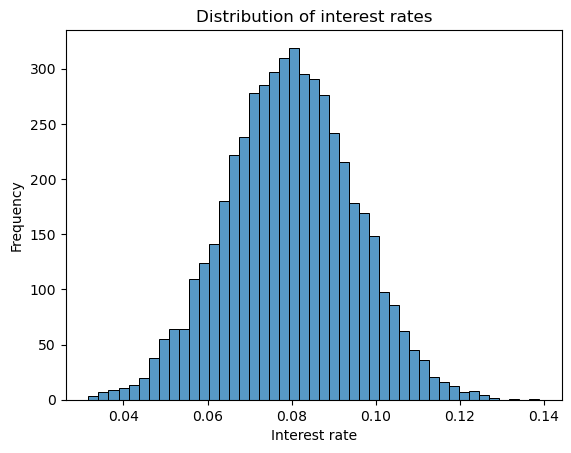

In [437]:
# histogram to understand the distribution interest rates
sns.histplot(data=df, x='interest_rate')
plt.title("Distribution of interest rates")
plt.xlabel("Interest rate")
plt.ylabel("Frequency")
plt.savefig("Distribution_interest_rate")
plt.show()

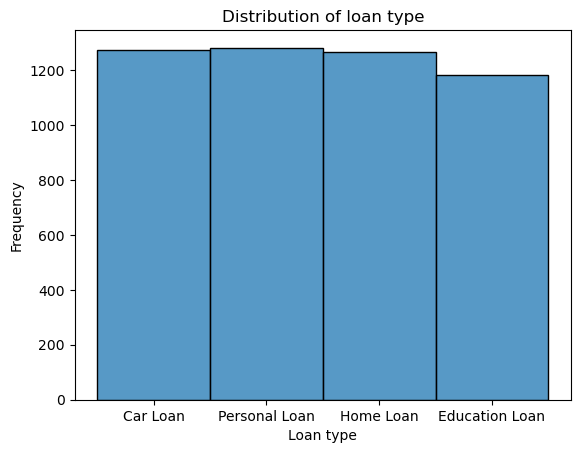

In [438]:
## Distribution of loan type
sns.histplot(df['loan_type'])
plt.title("Distribution of loan type")
plt.xlabel("Loan type")
plt.ylabel("Frequency")
plt.show()

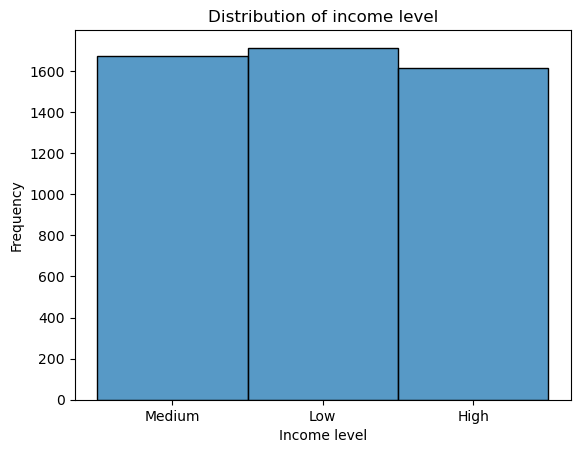

In [439]:
sns.histplot(df['income_level'])
plt.title("Distribution of income level")
plt.xlabel("Income level")
plt.ylabel("Frequency")
plt.show()

### Bar charts for loan type distribution or default rates by demographic features.


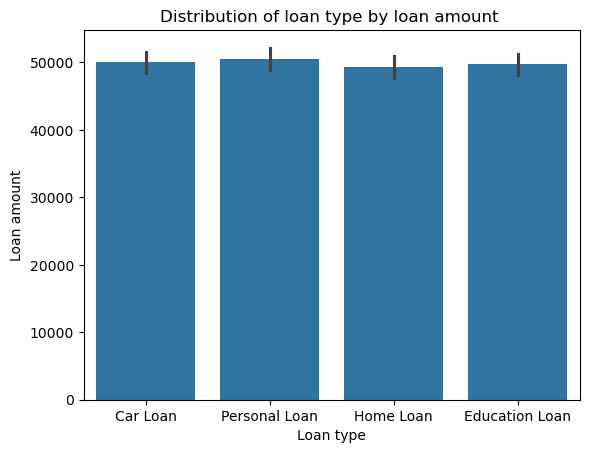

In [441]:
## Distribution of loan type by loan amount 
sns.barplot(x="loan_type", y= "loan_amount",data= df)
plt.title("Distribution of loan type by loan amount ")
plt.xlabel("Loan type")
plt.ylabel("Loan amount")
plt.show()

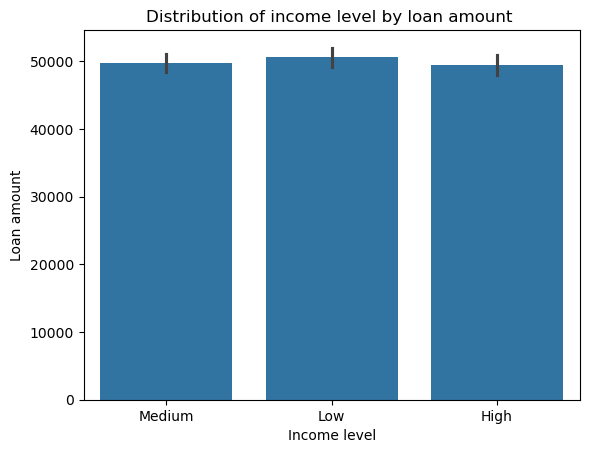

In [442]:
sns.barplot(x="income_level", y= "loan_amount",data= df)
plt.title("Distribution of income level by loan amount ")
plt.xlabel("Income level")
plt.ylabel("Loan amount")
plt.show()

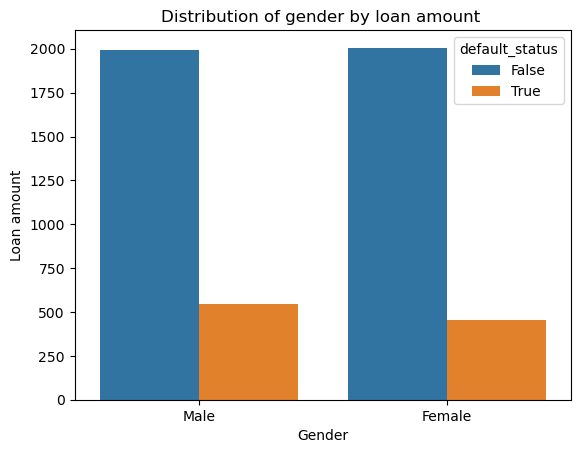

In [443]:
sns.countplot(x="gender", hue= "default_status",data= df)
plt.title("Distribution of gender by loan amount ")
plt.xlabel("Gender")
plt.ylabel("Loan amount")
plt.savefig("Distribution_gender_loan")
plt.show()

###  average default status for each income level

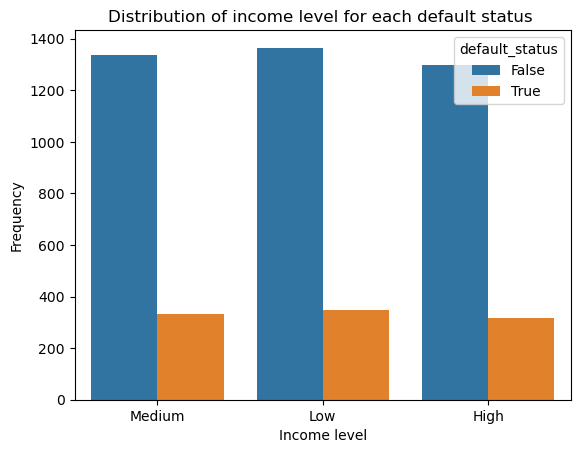

In [445]:
sns.countplot(x="income_level", hue= "default_status",data= df)
plt.title("Distribution of income level for each default status ")
plt.xlabel("Income level")
plt.ylabel("Frequency")
plt.show()

### Line charts for trends in loan applications and approvals over time.


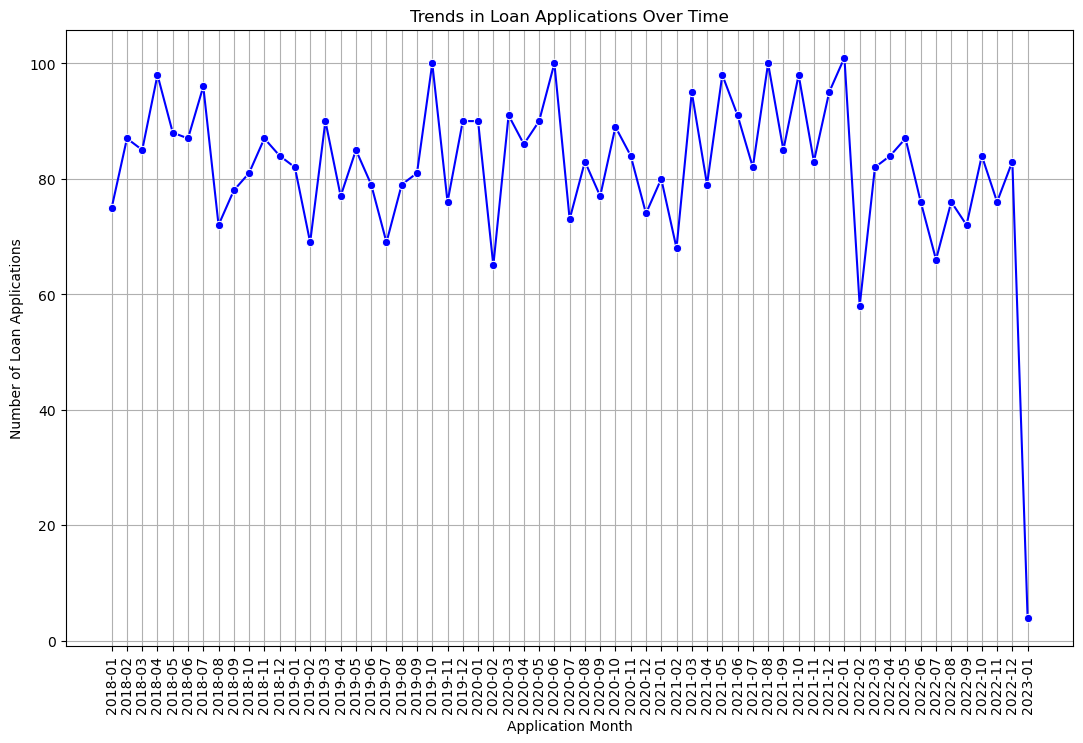

In [469]:
df['application_date'] = pd.to_datetime(df['application_date'],format='mixed')

# Extract the month/year for grouping
df['application_month'] = df['application_date'].dt.to_period('M')  # Monthly trends

# Group by month and count applications
applications_trend = df.groupby('application_month')['loan_id'].count().reset_index()
applications_trend['application_month'] = applications_trend['application_month'].astype(str)
plt.figure(figsize=(13, 8))
sns.lineplot(x='application_month', y='loan_id', data=applications_trend, marker='o', color='b')
# Chart aesthetics
plt.title('Trends in Loan Applications Over Time')
plt.xlabel('Application Month')
plt.ylabel('Number of Loan Applications')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.grid(True)
plt.savefig("Trends_loan_application")
plt.show()


In [288]:
### Apllications rise in february to march, agust to september and november.

### Loan approval over time

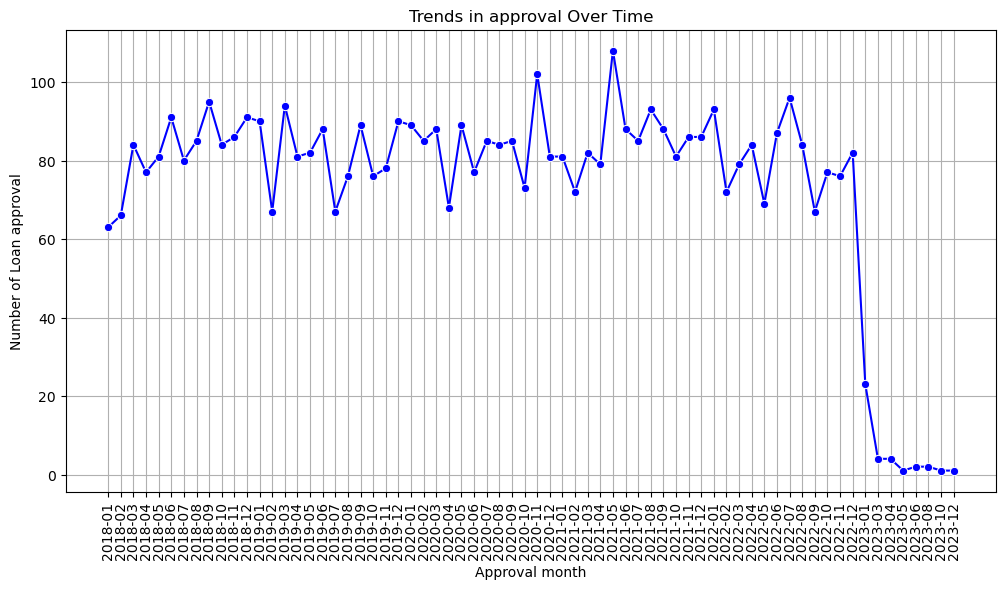

In [290]:
df['approval_date'] = pd.to_datetime(df['approval_date'],format='mixed')

# Extract the month/year for grouping
df['approval_month'] = df['approval_date'].dt.to_period('M')  # Monthly trends

# Group by month and count applications
applications_trend = df.groupby('approval_month')['loan_id'].count().reset_index()
applications_trend['approval_month'] = applications_trend['approval_month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='approval_month', y='loan_id', data=applications_trend, marker='o', color='b')
# Chart aesthetics
plt.title('Trends in approval Over Time')
plt.xlabel('Approval month')
plt.ylabel('Number of Loan approval')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.grid(True)
plt.show()

### Box plots to show the distribution of loan terms

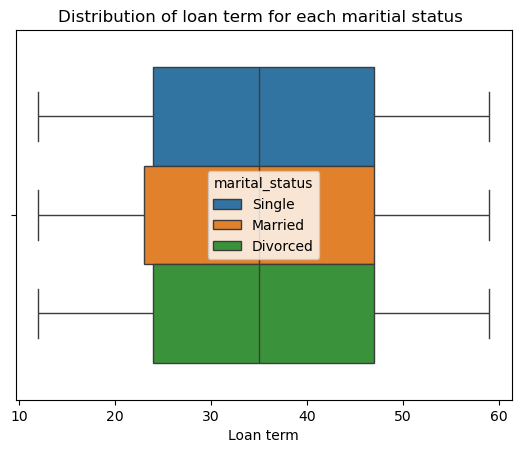

In [292]:
sns.boxplot(data=df, x='loan_term',hue ='marital_status')
plt.title("Distribution of loan term for each maritial status ")
plt.xlabel("Loan term")
plt.savefig("Loan_term_maritial_status")
plt.show()

### Box plots loan amount across loan type

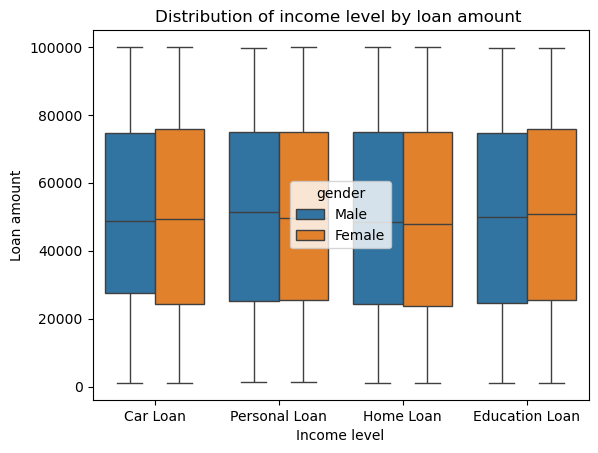

In [294]:
sns.boxplot(x= "loan_type",y = "loan_amount",hue ="gender", data= df)
plt.title("Distribution of income level by loan amount ")
plt.xlabel("Income level")
plt.ylabel("Loan amount")
plt.show()

### Heatmaps for correlations (e.g., between credit_score, loan_amount, interest_rate, etc.).


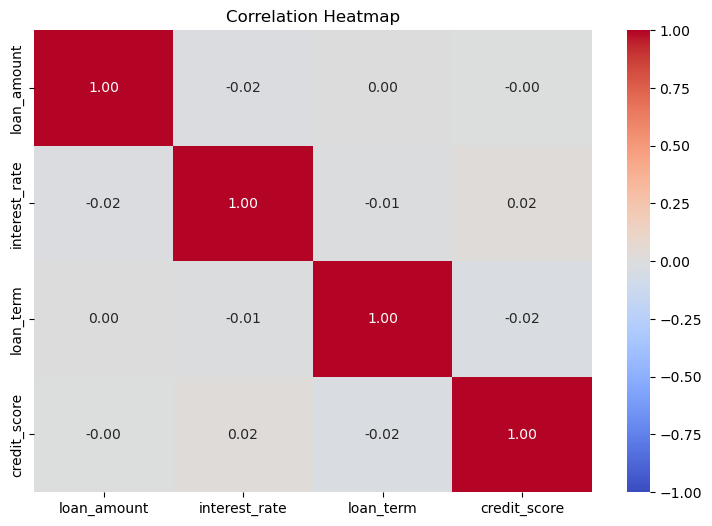

In [296]:
# Select only numeric columns for the correlation calculation
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True,vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.savefig("Correlation_heatmap_loan")
plt.show()

# Data preprocessing

In [298]:
# Missing value treatment
# mean, median, mode or KNNIputer


In [299]:
df.isnull().sum()
# do not do treatment to target columnKNNIputer
#  Do we only do it for numerical values?
## get column eg. for i in column :
##                   df[i].filina(df[i].median(), inplace = 'True'), inplace = 'True' changes the original data

# Or use nearest neigbhor

## from impute sklearn.impute import KNNImputer
## impute = KNNImputer()

## for i in df.select_dtypes(include="number").columns:
## df[i] = impute.fit_transform(df[i])



customer_id          0
loan_id              0
loan_type            0
loan_amount          0
interest_rate        0
loan_term            0
employment_type      0
income_level         0
credit_score         0
gender               0
marital_status       0
education_level      0
application_date     0
approval_date        0
disbursement_date    0
due_date             0
default_status       0
application_month    0
approval_month       0
dtype: int64

## 

In [301]:

# df= df.drop(['customer_id',	'loan_id',	'loan_type', 'loan_term',	'employment_type',	'income_level',	
#          'gender',	'marital_status',	'education_level',	'application_date',	'approval_date','disbursement_date'	,
#              'due_date','application_month',	'approval_month'],axis=1)


## OR


from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['loan_type'] = encoder.fit_transform(df['loan_type'])
df['employment_type'] = encoder.fit_transform(df['employment_type'])
df['income_level'] = encoder.fit_transform(df['income_level'])
df['gender'] = encoder.fit_transform(df['gender'])
df['marital_status'] = encoder.fit_transform(df['marital_status'])
df['education_level'] = encoder.fit_transform(df['education_level'])
df['default_status'] = encoder.fit_transform(df['default_status'])


df= df.drop(['customer_id',	'loan_id','application_date',	'approval_date','disbursement_date'	,
             'due_date','application_month','approval_month'],axis=1)

# df['default_status'] = pd.get_dummies(df['default_status'])
# df['gender'] = pd.get_dummies(df['gender'])

df

## OR

# Preprocess the data: Convert categorical variables, scale numerical ones
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer


# numeric_features = ['loan_amount', 'interest_rate', 'loan_term', 'credit_score']
# categorical_features = ['loan_type', 'employment_type', 'income_level', 'gender', 'marital_status', 'education_level']

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ]
# )


,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,default_status
0,0,16795,0.051852,15,2,2,833,1,2,2,0
1,3,1860,0.089296,56,0,2,776,0,1,0,0
2,3,77820,0.070470,51,0,1,697,1,0,1,0
3,0,55886,0.062155,30,0,1,795,0,1,3,0
4,2,7265,0.070635,48,1,1,519,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,0,37945,0.070087,57,2,0,511,1,1,3,0
4996,3,48937,0.056405,50,1,2,502,1,2,3,0
4997,2,7476,0.064212,58,0,0,452,0,2,1,1
4998,0,52756,0.094914,12,2,2,728,1,1,3,0


In [302]:
x = df.drop(['default_status'],axis=1)


In [303]:
y = df['default_status']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    1
4998    0
4999    0
Name: default_status, Length: 5000, dtype: int64

In [304]:
# 2) Splitting our data into training and testing sets
from sklearn.model_selection import train_test_split
#SEED = 42
np.random.seed(SEED)
x_train, x_test, y_train, y_test = train_test_split(x ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=SEED)

# Building Machine Learning Models

## KNeighborsClassifier

In [307]:
# Import the K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 20)
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []

# Training multiple models to find K that returns the best results
for k in kVals:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    
    train_score = classifier.score(x_train, y_train)
    train_f1score = f1_score(y_train, classifier.predict(x_train), average='macro')
    test_score = classifier.score(x_test, y_test)
    test_f1score = f1_score(y_test, classifier.predict(x_test), average='macro')
    
    train_accuracies.append(train_score)
    train_f1_scores.append(train_f1score)
    
    test_accuracies.append(test_score)
    test_f1_scores.append(test_f1score)
    
    print("K = {}, Training (acc:{:.0%}, f1:{:.0%}), Testing (acc:{:.0%}, f1:{:.0%})"\
          .format(k, train_score, train_f1score, test_score, test_f1score))

K = 1, Training (acc:100%, f1:100%), Testing (acc:68%, f1:50%)
K = 2, Training (acc:84%, f1:61%), Testing (acc:77%, f1:46%)
K = 3, Training (acc:84%, f1:68%), Testing (acc:75%, f1:51%)
K = 4, Training (acc:81%, f1:53%), Testing (acc:78%, f1:46%)
K = 5, Training (acc:81%, f1:57%), Testing (acc:76%, f1:46%)
K = 6, Training (acc:81%, f1:49%), Testing (acc:79%, f1:45%)
K = 7, Training (acc:81%, f1:52%), Testing (acc:78%, f1:45%)
K = 8, Training (acc:80%, f1:48%), Testing (acc:79%, f1:45%)
K = 9, Training (acc:80%, f1:50%), Testing (acc:79%, f1:45%)
K = 10, Training (acc:80%, f1:47%), Testing (acc:80%, f1:44%)
K = 11, Training (acc:80%, f1:48%), Testing (acc:80%, f1:46%)
K = 12, Training (acc:80%, f1:46%), Testing (acc:80%, f1:44%)
K = 13, Training (acc:80%, f1:46%), Testing (acc:80%, f1:45%)
K = 14, Training (acc:80%, f1:45%), Testing (acc:80%, f1:45%)
K = 15, Training (acc:80%, f1:46%), Testing (acc:80%, f1:45%)
K = 16, Training (acc:80%, f1:45%), Testing (acc:80%, f1:45%)
K = 17, Trainin

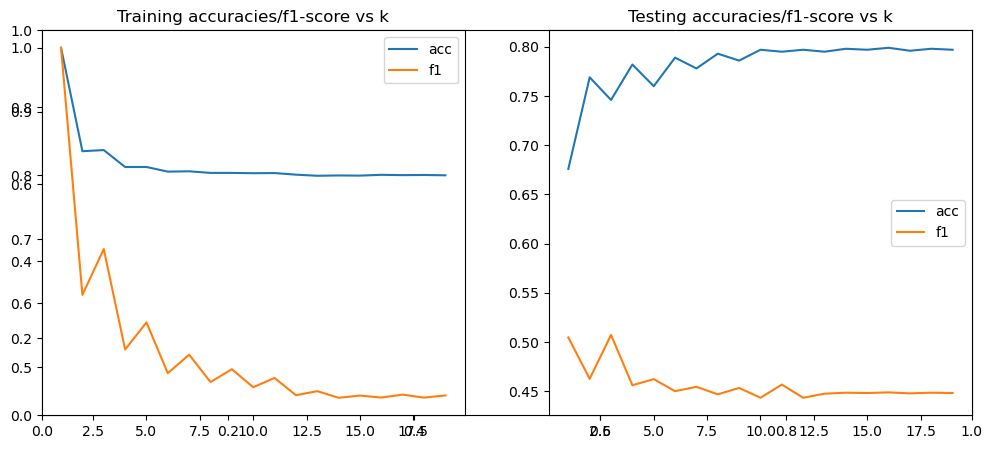

In [308]:
# Plot two charts:
# 1. Training accuracies and F1-Score versus K
# 2. Testing accuracies and F1-Score versus K
plt.subplots(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(kVals, train_accuracies)
plt.plot(kVals, train_f1_scores)
plt.title('Training accuracies/f1-score vs k')
plt.legend(['acc', 'f1'])

plt.subplot(1,2,2)
plt.plot(kVals, test_accuracies)
plt.plot(kVals, test_f1_scores)
plt.title('Testing accuracies/f1-score vs k')
plt.legend(['acc', 'f1'])
plt.show()

In [309]:
i = int(np.argmax(test_accuracies))
print("Best 'Testing Accuracy = {:.2%}' with 'K = {}'".format(test_accuracies[i], i+1))
j = int(np.argmax(test_f1_scores))
print("Best 'Testing F1-score = {:.2%}' with 'K = {}'".format(test_f1_scores[j], j+1))

Best 'Testing Accuracy = 79.90%' with 'K = 16'
Best 'Testing F1-score = 50.74%' with 'K = 3'


In [310]:
# We now train our final model using K that returned with the best results
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [311]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(x_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [312]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred))
print()

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Classification report:

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       800
           1       0.11      0.01      0.01       200

    accuracy                           0.79      1000
   macro avg       0.46      0.50      0.45      1000
weighted avg       0.66      0.79      0.71      1000


Confusion Matrix:


array([[792,   8],
       [199,   1]], dtype=int64)

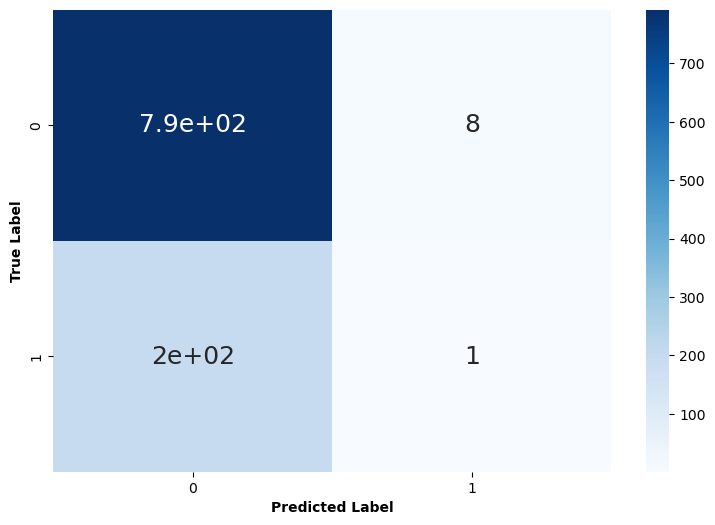

In [313]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,6))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')
plt.savefig("Confusion_KNN_loan")

## Logistic regression

In [315]:
# Import the logistic regression algorithm
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=2000)

# Train the model
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [316]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(x_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [317]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
4345,0,0
1563,0,0
3228,0,0
1341,0,0
4857,0,0
4540,0,0
424,0,0
4955,0,0
638,0,0
2498,0,0


In [318]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred))
print()

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Classification report:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       800
           1       0.00      0.00      0.00       200

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.64      0.80      0.71      1000


Confusion Matrix:


C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[800,   0],
       [200,   0]], dtype=int64)

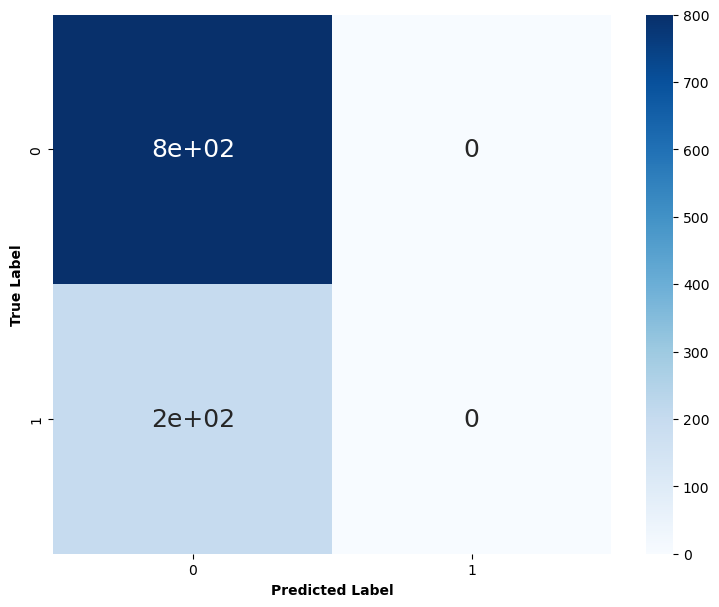

In [319]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

In [320]:
# Accuracy Score
test_acc = classifier.score(x_test, y_test)
print("Accuracy  = {:.2f}".format(test_acc))

# Precision
test_pre = precision_score(y_test, y_pred, average=None)
print("Precision = {}".format(test_pre))

# Recall
test_rec  = recall_score(y_test, y_pred, average=None)
print("Recall    = {}".format(test_rec))

Accuracy  = 0.80
Precision = [0.8 0. ]
Recall    = [1. 0.]


C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


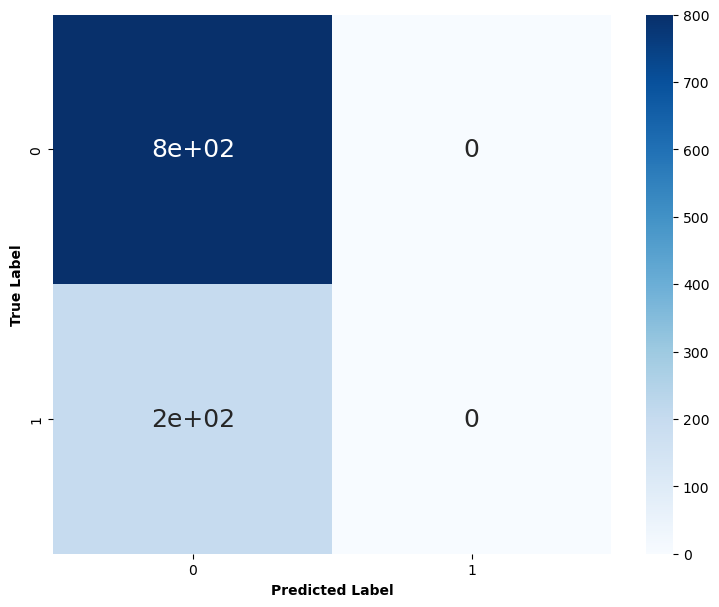

In [321]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

## Decision Tree

In [323]:
# Import the Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=SEED)

In [324]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': range(1,10),
              'min_samples_split': range(1, 10),
              'min_samples_leaf': range(1, 5)}

gs_clf = GridSearchCV(clf,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf.fit(x_train, y_train)
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf.best_params_, gs_clf.best_score_))

'{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 9}' gives the best F1-score at: 47.71%


C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mulwe\anaconda3\Lib\site-packa

In [325]:
# Training the final model using the best parameters from above fine-tuning
classifier = gs_clf.best_estimator_
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=9,
                       random_state=42)

In [326]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(x_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [327]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
4345,0,0
1563,0,0
3228,0,0
1341,0,0
4857,0,0
4540,0,0
424,0,0
4955,0,0
638,0,0
2498,0,0


In [328]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred))
print()

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Classification report:

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       800
           1       0.15      0.04      0.06       200

    accuracy                           0.76      1000
   macro avg       0.48      0.49      0.46      1000
weighted avg       0.67      0.76      0.70      1000


Confusion Matrix:


array([[756,  44],
       [192,   8]], dtype=int64)

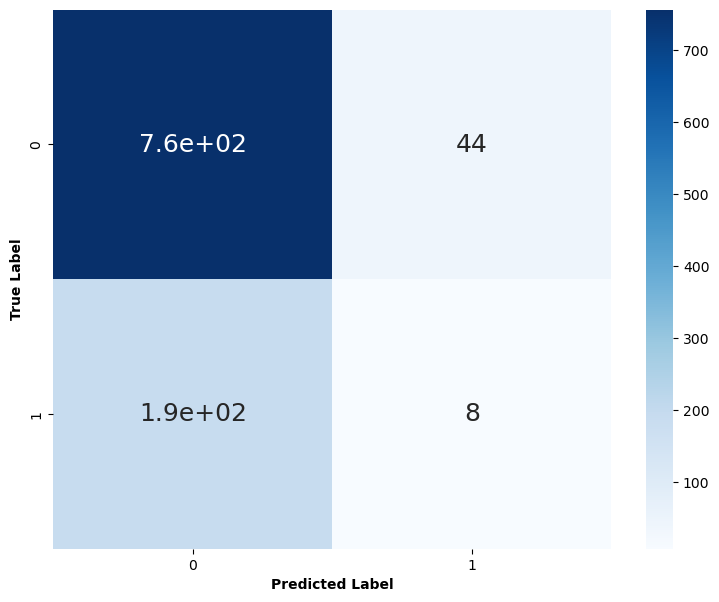

In [329]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

## SVM

In [331]:
# Import the Support Vector Machines algorithm
from sklearn.svm import LinearSVC
clf = LinearSVC()
X_train = x_train
X_test = x_test

In [332]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.logspace(-4.5, -1.3, 10),
              'penalty': ['l1', 'l2']}


gs_clf = GridSearchCV(clf,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf.fit(X_train, y_train)
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf.best_params_, gs_clf.best_score_))

C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\svm\_classes.py", line 325, in fit
    self.coef_, self.int

'{'C': 3.1622776601683795e-05, 'penalty': 'l2'}' gives the best F1-score at: 44.45%


C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [333]:
# Training the final model using the best parameters from above fine-tuning
classifier = LinearSVC(C=0.0501187, penalty='l2')
classifier.fit(X_train, y_train)

C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\mulwe\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.0501187)

In [334]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [335]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
4345,0,1
1563,0,1
3228,0,1
1341,0,1
4857,0,1
4540,0,1
424,0,1
4955,0,1
638,0,1
2498,0,1


In [336]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred))
print()

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Classification report:

              precision    recall  f1-score   support

           0       0.83      0.26      0.39       800
           1       0.21      0.80      0.33       200

    accuracy                           0.36      1000
   macro avg       0.52      0.53      0.36      1000
weighted avg       0.71      0.36      0.38      1000


Confusion Matrix:


array([[206, 594],
       [ 41, 159]], dtype=int64)

In [ ]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Reds)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

# Additional Machine learning Models

## K-Means clustering

In [339]:
# Import our Kmeans algorithm
from sklearn.cluster import KMeans
x_cluster= df
wcss = []
for i in range(1,11):
    print("number of cluster", i)
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_cluster)
    # print(kmeans)
    wcss.append(kmeans.inertia_) # WCSS is also called inertia
    print(wcss)

number of cluster 1
[4123852758065.6064]
number of cluster 2
[4123852758065.6064, 1014128751847.1078]
number of cluster 3
[4123852758065.6064, 1014128751847.1078, 451682552337.399]
number of cluster 4
[4123852758065.6064, 1014128751847.1078, 451682552337.399, 258141421204.8549]
number of cluster 5
[4123852758065.6064, 1014128751847.1078, 451682552337.399, 258141421204.8549, 159933105424.32922]
number of cluster 6
[4123852758065.6064, 1014128751847.1078, 451682552337.399, 258141421204.8549, 159933105424.32922, 111458643524.82526]
number of cluster 7
[4123852758065.6064, 1014128751847.1078, 451682552337.399, 258141421204.8549, 159933105424.32922, 111458643524.82526, 81941493086.12427]
number of cluster 8
[4123852758065.6064, 1014128751847.1078, 451682552337.399, 258141421204.8549, 159933105424.32922, 111458643524.82526, 81941493086.12427, 63947520071.900085]
number of cluster 9
[4123852758065.6064, 1014128751847.1078, 451682552337.399, 258141421204.8549, 159933105424.32922, 111458643524.

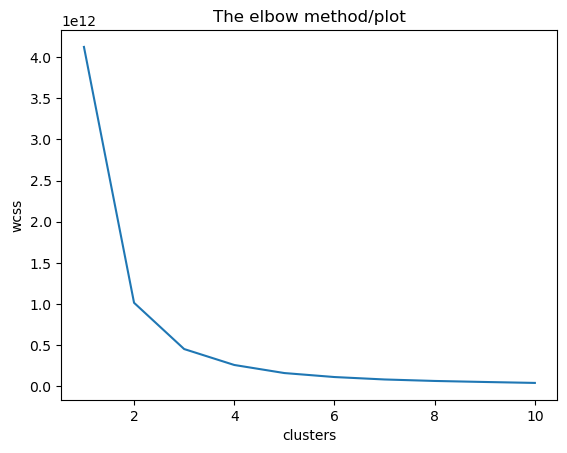

In [340]:
# plot the results in a line chart
plt.plot(range(1,11), wcss)
plt.title('The elbow method/plot')
plt.xlabel('clusters')
plt.ylabel('wcss')
plt.show()

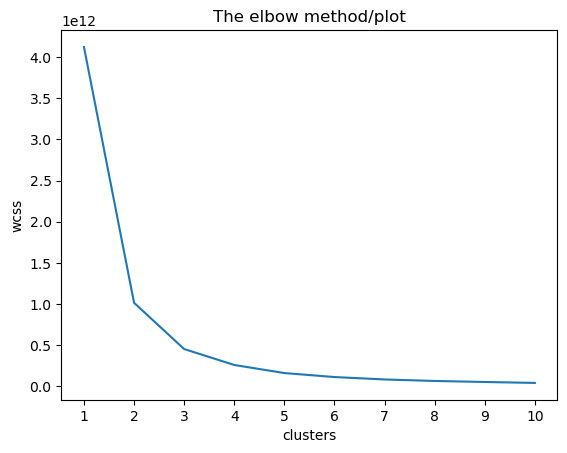

In [341]:
# Plot the results on a line chart
# Allow us to observe the elbow
# plot the results in a line chart
plt.plot(range(1,11), wcss)
plt.title('The elbow method/plot')
plt.xlabel('clusters')
plt.ylabel('wcss')
K = range(1, 11)
plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()

In [342]:
# We have decided on a k value = 3
kmeans = KMeans(n_clusters=3)
kmeans_model = kmeans.fit(x_cluster) # Training the model on input data

y_kmeans = kmeans_model.predict(x_cluster)
print(y_kmeans)

[1 1 2 ... 1 0 2]


In [343]:
# Visualize the clusters
# 2D plots on any 2 columns

# plt.figure(figsize=(20,9))

# # Plot scatter plots
# plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],
#            s=50000, c='red', label='Cluster 0')
# plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],
#            s=50000, c='blue', label='Cluster 1')
# plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],
#            s=50000, c='green', label='Cluster 2')

# # Cluster Centroids
# plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1],
#            s=50000, c='yellow', label='Centroids')

# plt.xlabel('sepal length (cm)')
# plt.ylabel('sepal width (cm)')
# plt.legend()
# plt.show()

## Linear Regression

In [345]:
# Import the linear regression algorithm
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
X = df['credit_score'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=True, random_state=np.random.seed(SEED))

# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

### Step 5: Visualize the trained model

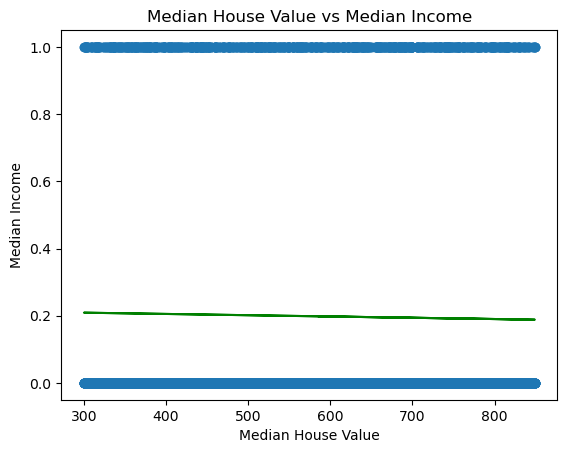

In [347]:
# y=mx+c (Linear regression model)
line = regressor.coef_*X + regressor.intercept_

# Lets plot this on the scatter plot
plt.scatter(X,y)
plt.plot(X,line, 'g')
plt.xlabel("Median House Value")
plt.ylabel("Median Income")
plt.title("Median House Value vs Median Income")
plt.show()

## Method not suitable